In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df= pd.read_csv('diabetes.csv')

In [13]:
# Split the dataset into predictor variables X  and target variables y
X = df.drop("Outcome",axis =1)
y = df['Outcome']

In [15]:
#Split data into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
#Create and train a logistic Regression Model
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [59]:
#Make Predictions
y_test_prediction = classifier.predict(X_test)
y_train_prediction = classifier.predict(X_train) 
y_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
#Display predictions comparision
comparision = pd.DataFrame({'Actual': Y_test , 'predicted' : y_test_prediction})
print(comparision.head(10))

     Actual  predicted
668       0          0
324       0          0
624       0          0
690       0          0
473       0          0
204       0          0
97        0          0
336       0          1
568       0          1
148       0          1


In [25]:
#print accuracy score
print(f"Test Accuracy: {accuracy_score(Y_test,y_test_prediction):.4f}")
print(f"Test Accuracy: {accuracy_score(Y_train,y_train_prediction):.4f}")

Test Accuracy: 0.7532
Test Accuracy: 0.7821


In [27]:
#Confusion matrix
conf_mat = confusion_matrix(Y_test, y_test_prediction)
print("\nConfusion Matrix :")
print(conf_mat)


Confusion Matrix :
[[126  25]
 [ 32  48]]


Text(0.5, 1.0, 'Confusion Matrix')

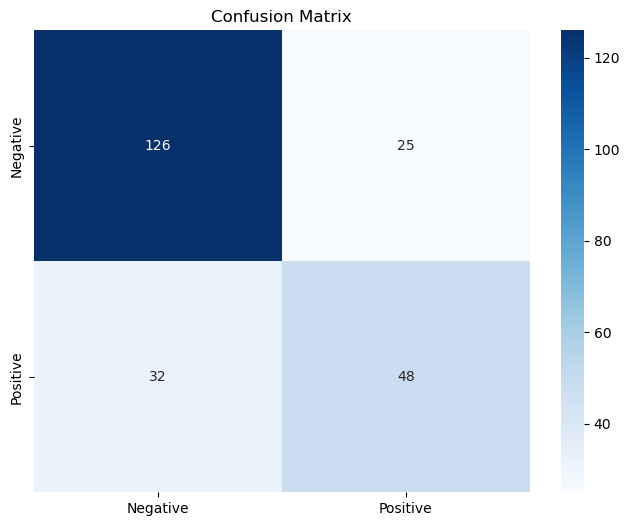

In [31]:
#Visualize Confusion matrix usingheatmap
plt.figure(figsize = (8,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.title("Confusion Matrix")


In [37]:
#classification report
print('Classification Report')
print(classification_report(Y_test, y_test_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [43]:
#Calculate additinal matrix 
TN, FP, FN, TP = conf_mat.ravel()

In [47]:
recall = TP/ (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
accuracy = (TP + TN) / (TP + FP + FN + TN)

In [53]:
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Recall: 0.6000
Precision: 0.6575
Specificity: 0.8344
Accuracy: 0.7532


In [55]:
#Another Technique
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, f1_score

In [57]:
#Extract TP, TN, FP, FN 
conf_mat = confusion_matrix(Y_test , y_test_prediction)
print(conf_mat)

[[126  25]
 [ 32  48]]
